In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.font_manager as font_manager
%matplotlib inline

In [137]:
path = '/home/username/fantasy.ttf'
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

FileNotFoundError: [Errno 2] No such file or directory: '/home/username/fantasy.ttf'

In [131]:
df_products = pd.read_csv('products_data.csv')
df_purchases = pd.read_csv('purchases_data.csv')

In [132]:
full = df_purchases.join(df_products.set_index('Product'), 'Product')

In [133]:
summary = full.groupby('Subcategory').Cost.sum()
summary

Subcategory
Крупа, сахар, мука     1199.09
Молочная продукция      436.08
Мясо                    536.39
Прочее                   62.41
Птица                 14318.53
Семечки, сухарики       164.20
Чай, кофе              1410.38
Name: Cost, dtype: float64

In [134]:
explode = summary == summary.max()
explode.replace(True, value=0.2)

Subcategory
Крупа, сахар, мука    0.0
Молочная продукция    0.0
Мясо                  0.0
Прочее                0.0
Птица                 0.2
Семечки, сухарики     0.0
Чай, кофе             0.0
Name: Cost, dtype: float64

(-0.89084349040646416, 1.1193435170282278, -1.9987686160492042, 1.0)

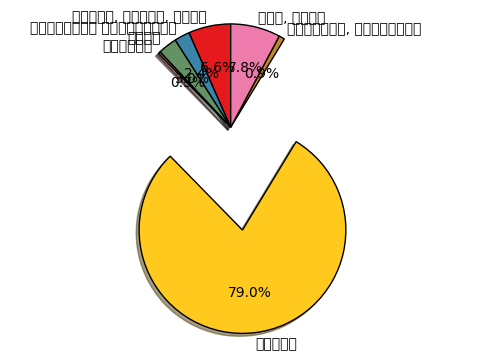

In [135]:
# The slices will be ordered and plotted counter-clockwise.
labels = summary.index
sizes = summary
colors = cm.Set1(np.arange(summary.size)/float(summary.size))
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')